In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

In [5]:
data =pd.read_csv('used_cars_dataset.csv')

In [7]:
data.columns

Index(['name', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'selling_price'],
      dtype='object')

In [8]:
data.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000


In [27]:
num_columns=["year","km_driven","selling_price"]
cat_columns=["name","fuel","owner","transmission"]
rules=[("num_tag", MinMaxScaler(),num_columns),("cat_tag",OneHotEncoder(),cat_columns)]
preprocessor=ColumnTransformer(rules)
x=preprocessor.fit_transform(data)
y=data['selling_price']

In [28]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [29]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred=model.predict(x_test)

In [34]:
print("r2 score", r2_score(y_test, y_pred))

r2 score 0.9999999954193833


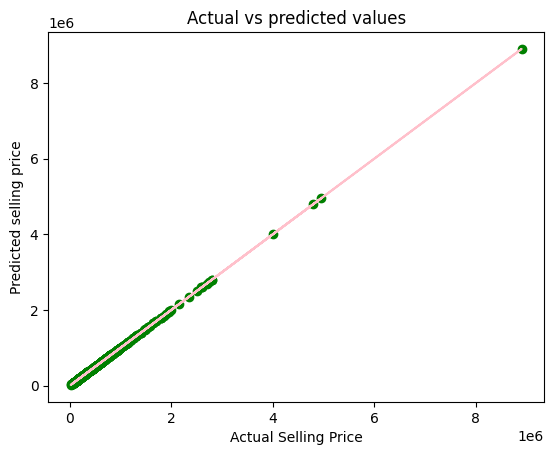

In [35]:
plt.scatter(y_test, y_pred, color='green')
plt.plot(y_test, y_pred, color='pink')
plt.title("Actual vs predicted values")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted selling price")
plt.show()

<Axes: >

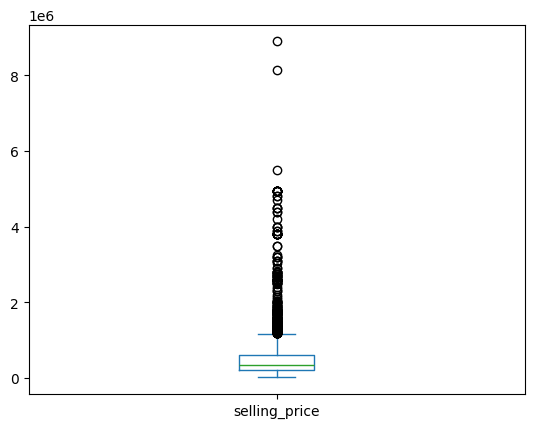

In [38]:
data['selling_price'].plot.box()

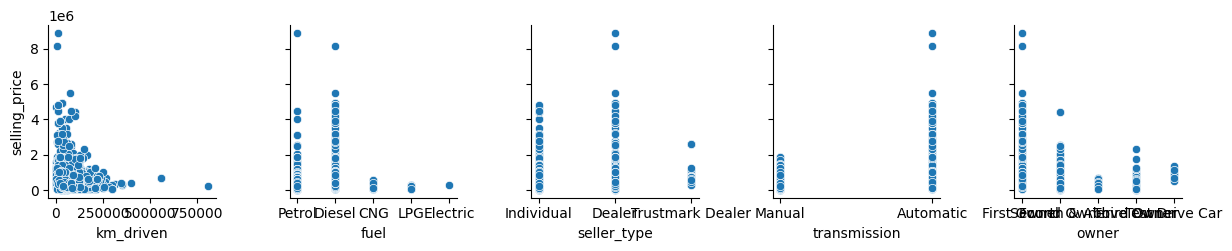

In [44]:
sns.pairplot(data=data, x_vars=["km_driven",	"fuel",	"seller_type",	"transmission",	"owner"],
             y_vars="selling_price")